# KNN Classifier
Now using k-fold

## Oral Toxicity Dataset

### Imports and data loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import ds_functions as ds

data: pd.DataFrame = pd.read_csv('../../datasets/qsar_oral_toxicity.csv', sep=';', header=None)  

### Prepare data

In [2]:
y: np.ndarray = data.pop(1024).values # Target Variable
X: np.ndarray = data.values # Values of each feature on each record
labels = pd.unique(y)

kf = KFold(n_splits = 15, shuffle=True)

In [3]:
nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
dist = 'jaccard'  #We decided to not even test the other 3, for obvious reasons

As proximas celulas são de exemplo, com apenas para k=3 e um plot para um dos splits.
O resto está abaixo, mas ainda tem de correr.

In [5]:
knn = KNeighborsClassifier(n_neighbors=3, metric=dist)
scores = cross_val_score(knn, X, y, cv=kf)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
m_accuracy = scores.mean()

Accuracy: 0.94 (+/- 0.02)


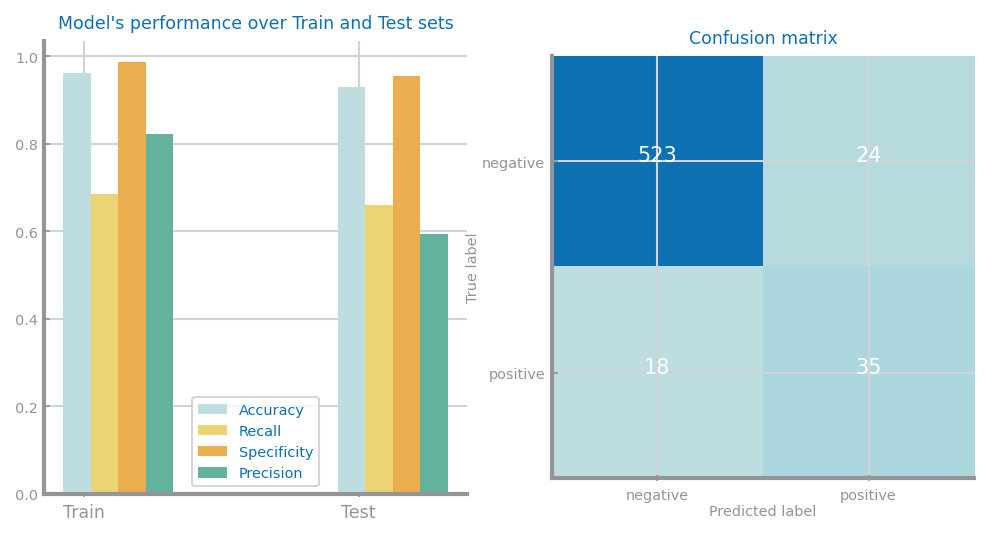

In [8]:
i=0
for train_index, test_index in kf.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    
    knn.fit(trnX, trnY)
    prd_trn = knn.predict(trnX)
    prd_tst = knn.predict(tstX)
    
    ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
    if i==0:
        break

Depois com tempo correr antes isto para termos comparações:

In [ ]:
#best = (0,"")
#lb=0
#for n in nvalues:
#    knn = KNeighborsClassifier(n_neighbors=3, metric=dist)
#    scores = cross_val_score(knn, X, y, cv=kf)
#    m_acc = scores.mean()
#    print("for {} k and jaccard we got {} acc".format(n, m_acc))
#     if m_acc > last_best:
#            best = (n, 'jaccard')
#            last_best = m_acc

    

E correr a proxima para vermos como se comporta em cada um dos folds

In [ ]:
for train_index, test_index in kf.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    
    knn = KNeighborsClassifier(n_neighbors=best[0], metric='jaccard')
    knn.fit(trnX, trnY)
    prd_trn = knn.predict(trnX)
    prd_tst = knn.predict(tstX)
    
    ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

Isto demora só buéééééé tempo a correr.
Cancelei tudo para se poder meter no github e mostrar um pouco só a titulo de exemplo, esta semana agora deixo a correr outra vez durante a noite e com um pouco de sorte não vai crashar.